In [ ]:
import tensorflow as tf
import   keras 
from   keras.datasets   import   cifar10 
from   keras.applications   import   VGG19 
from keras.layers import Input

In [ ]:
vgg19_model = VGG19(include_top = True, weights='imagenet')
vgg19_model.summary()

574710816/574710816 [==============================] - 26s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout


model = Sequential()


for layer in vgg19_model.layers[:-1]:
  model.add(layer)
  

for layer in model.layers:
  layer.trainable = False
  

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
(x_train, y_train) , (x_val, y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:


import numpy as np
import cv2



In [ ]:


import matplotlib.pyplot as plt

NUM_CLASSES = 10


y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)



In [ ]:

def getBatch(batch_size, train_or_val='train'):
  x_batch = []
  y_batch = []
  if train_or_val == 'train':
    idx = np.random.randint(0, len(x_train), (batch_size))

    for i in idx:
      img = cv2.resize(x_train[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_train[i])
  elif train_or_val == 'val':
    idx = np.random.randint(0, len(x_val), (batch_size))

    for i in idx:
      img = cv2.resize(x_val[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_val[i]) 
  else:
    print("error, please specify train or val")
   
  x_batch = np.array(x_batch)
  y_batch = np.array(y_batch)
  return x_batch, y_batch
    



In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [ ]:
EPOCHS = 20
BATCH_SIZE = 250
VAL_SIZE = 500
STEPS = 50


for e in range(EPOCHS):
  train_loss = 0
  train_acc = 0

  for s in range(STEPS):
    x_batch, y_batch = getBatch(BATCH_SIZE, "train")
    out = model.train_on_batch(x_batch, y_batch)
    train_loss += out[0]
    train_acc += out[1]
  
  print(f"Epoch: {e}\nTraining Loss = {train_loss / STEPS}\tTraining Acc = {train_acc / STEPS}")
  
  x_v, y_v = getBatch(VAL_SIZE, "val")
  eval = model.evaluate(x_v, y_v)
  print(f"Validation loss: {eval[0]}\tValidation Acc: {eval[1]}\n")
  
  





Epoch: 0
Training Loss = 1.6571410858631135	Training Acc = 0.5469600002467633
16/16 [==============================] - 8s 303ms/step - loss: 0.8139 - categorical_accuracy: 0.7560
Validation loss: 0.8138773441314697	Validation Acc: 0.7559999823570251

Epoch: 1
Training Loss = 1.0150542783737182	Training Acc = 0.6909600007534027
16/16 [==============================] - 3s 180ms/step - loss: 0.7391 - categorical_accuracy: 0.7700
Validation loss: 0.739083468914032	Validation Acc: 0.7699999809265137

Epoch: 2
Training Loss = 0.8927233648300171	Training Acc = 0.7166400003433228
16/16 [==============================] - 3s 180ms/step - loss: 0.5963 - categorical_accuracy: 0.7940
Validation loss: 0.5962512493133545	Validation Acc: 0.7940000295639038

Epoch: 3
Training Loss = 0.8004433035850524	Training Acc = 0.7409600043296813
16/16 [==============================] - 3s 180ms/step - loss: 0.6173 - categorical_accuracy: 0.7920
Validation loss: 0.6173408627510071	Validation Acc: 0.791999995708465

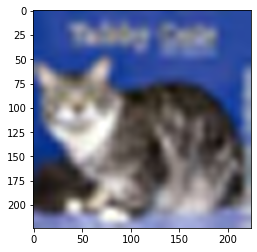

1/1 [==============================] - 1s 849ms/step
pred: cat
acct: cat


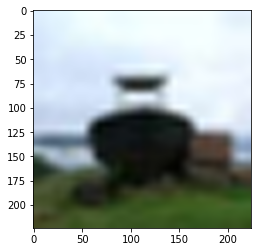

1/1 [==============================] - 0s 15ms/step
pred: airplane
acct: ship


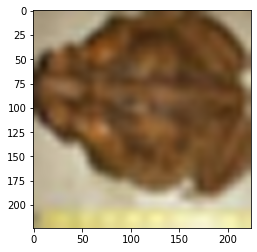

1/1 [==============================] - 0s 24ms/step
pred: frog
acct: frog


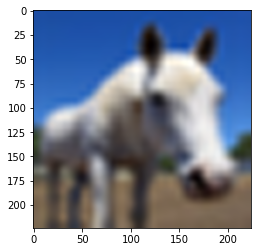

1/1 [==============================] - 0s 17ms/step
pred: dog
acct: horse


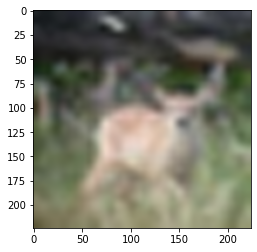

1/1 [==============================] - 0s 16ms/step
pred: deer
acct: deer


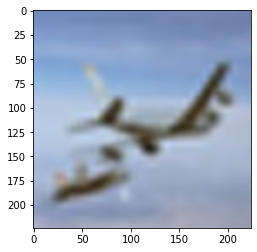

1/1 [==============================] - 0s 26ms/step
pred: airplane
acct: airplane


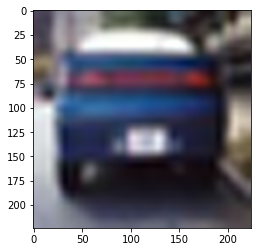

1/1 [==============================] - 0s 20ms/step
pred: truck
acct: automobile


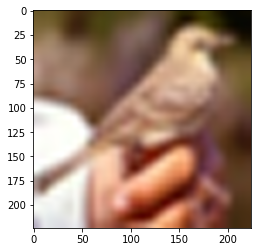

1/1 [==============================] - 0s 24ms/step
pred: bird
acct: bird


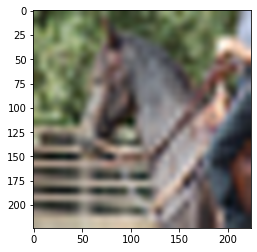

1/1 [==============================] - 0s 19ms/step
pred: horse
acct: horse


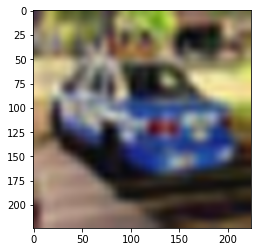

1/1 [==============================] - 0s 23ms/step
pred: automobile
acct: automobile


In [ ]:

CATEGORIES = "airplane automobile bird cat deer dog frog horse ship truck".split(" ")

import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

for i in range(10):

  import numpy as np
  plt.imshow(x_v[i])
  plt.show()
  print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
  print("acct: " + CATEGORIES[np.argmax(y_v[i])])


 

